In [9]:
import pandas as pd
import gzip
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
haps = open('hap_library.txt','r')
pos = haps.readline().strip().split()
poser = [int(i.split(':')[1]) for i in pos]
pos_series = pd.Series(poser)

In [3]:
poser[243041]

15300335

In [4]:
start = pos_series[(pos_series>15300000) & (pos_series<15700000)].index.tolist()[0]
stop  = pos_series[(pos_series>15300000) & (pos_series<15700000)].index.tolist()[-1]
print start
stop

243041


248321

In [19]:
genotypes = []
for line in haps:
    genotypes.append(line[start:stop])

In [6]:
len(genotypes)
genotypes[0][40:80]

'0202220202000002030020000022222022020200'

In [4]:
trans = {'0':('0','0'),'2' :('1','1'),'3':('0','1'),'4':('1','0'),'5':('0','0')}

In [3]:

for i in genotypes[0][40:80]:
    a,b = trans[i]
print a
print b

0
0


In [8]:
haplist = []
for anim in genotypes:
    ma = []
    pa = []
    for pos in anim:
        a,b = trans[pos]
        ma.append(a)
        pa.append(b)
    haplist.append(''.join(ma))
    haplist.append(''.join(pa))

In [23]:
print len(haplist)
print len(set(haplist))
print len(haplist[0])

2294
2287
8000


In [12]:
sub = [i[500:600] for i in haplist]
len(set(sub))

497

In [13]:
Counter(sub).most_common(10)

[('0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  581),
 ('0100100000001000001000101110000000001010101101010001111111101101111011111111110111111111111101111110',
  175),
 ('0000100001001001000000101110010000001010111101010011111111101111111011111111110111101111111101111110',
  131),
 ('0000000000001000100000101110000100001010101101010001111111101101111011111111110111101111111101111111',
  101),
 ('0100000000001000001000101110000000001010101101010001111111101101111011111111110111111111111101111110',
  66),
 ('0000000000011000000000101110000000001010101101010001111111101101111011111111110111101111111101111111',
  58),
 ('0000000001001001000000101110010000001010111101010011111111111111111011111111110111101111111101111110',
  52),
 ('0000100001001001000000101110010000001010111101010011111111111111111011111111110111101111111101111110',
  43),
 ('00000000010010010000001011100100000010101111010100111111111011111110111111111101111011111

In [14]:
counts = [i[1]/float(2274) for i in Counter(sub).most_common(497)]
pltter=pd.Series(counts)

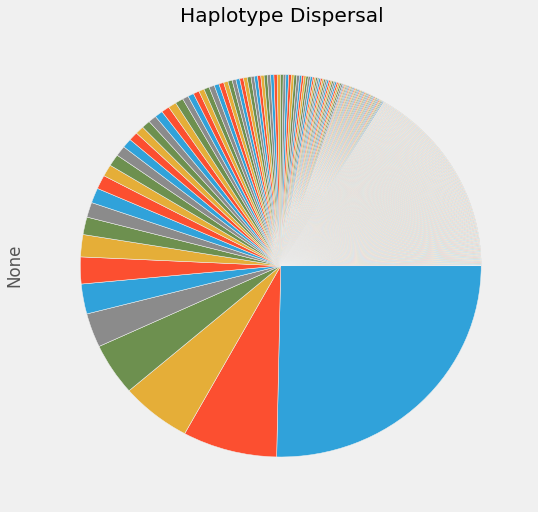

In [15]:
matplotlib.style.use('fivethirtyeight')
pltter.plot(kind='pie',labels=None,title='Haplotype Dispersal',counterclock=False,figsize=(8,8))


In [94]:
#sorted(Counter(sub).values()).head()

In [1]:
haps = open('hap_library.txt','r')
pos = haps.readline().strip().split()
genotypes = []
for line in haps:
    genotypes.append(line.strip())

In [5]:
haplist = []
for anim in genotypes:
    ma = []
    pa = []
    for pos in anim:
        a,b = trans[pos]
        ma.append(a)
        pa.append(b)
    haplist.append(''.join(ma))
    haplist.append(''.join(pa))

In [6]:
print len(haplist)
print len(set(haplist))
print len(haplist[0])

2294
2293
651561


In [7]:
sub = [i[3500:3600] for i in haplist]
len(set(sub))

570

In [10]:
sumhash = {}
for i in range((len(haplist[0])//100)): #go through genome x/100 times
    start = i*100
    stop = start + 100 # increment by 100 everytime
    sub = [d[start:stop] for d in haplist]
    bim = Counter(sub).most_common()
    count = 0
    j = 0
    sums = []
    for d in bim:
        l,j =  sum([int(k) for k in  d[0]]) ,  d[1] #calculate the average distance from hereford for each hap in the window 
        count += j
        sums.append(l)
    sumhash[i] = sums

In [ ]:
truncated = {}
for i in range(len(sumhash)):
    hundo = sumhash[i][:100]
    truncated[i] = hundo
print len(truncated)
for i in truncated:
    if len(truncated[i]) != 100:
        print len(truncated[i])

In [35]:
refdist = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in sumhash.iteritems() ]))
refdist.shape

(1522, 6515)

In [39]:
refdist =refdist.T

In [95]:
refdist.to_pickle('dist_to_hereford_reference_df.pk')

In [56]:
refdist['mean'] = refdist.mean(axis=1,numeric_only=True)
refdist['std'] =refdist.std(axis=1,numeric_only=True)

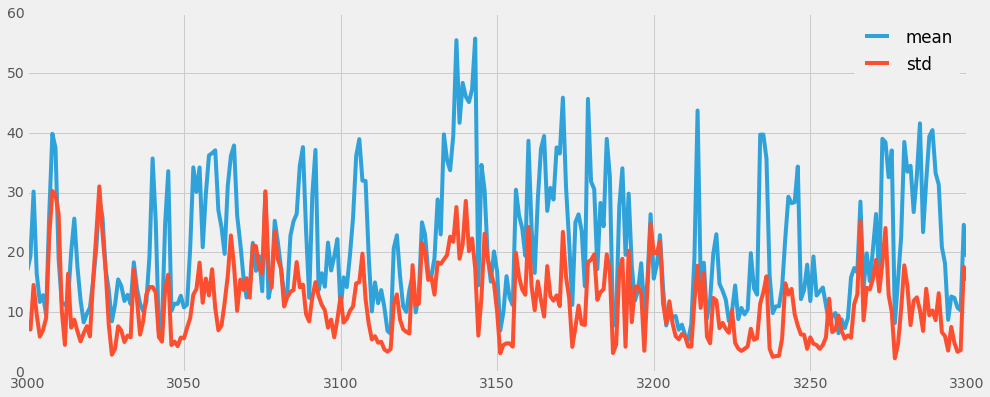

In [87]:
matplotlib.style.use('fivethirtyeight')
refdist.loc[3000:3300,['mean','std']].plot(figsize=(15,6))

In [92]:
import warnings
warnings.filterwarnings('ignore')

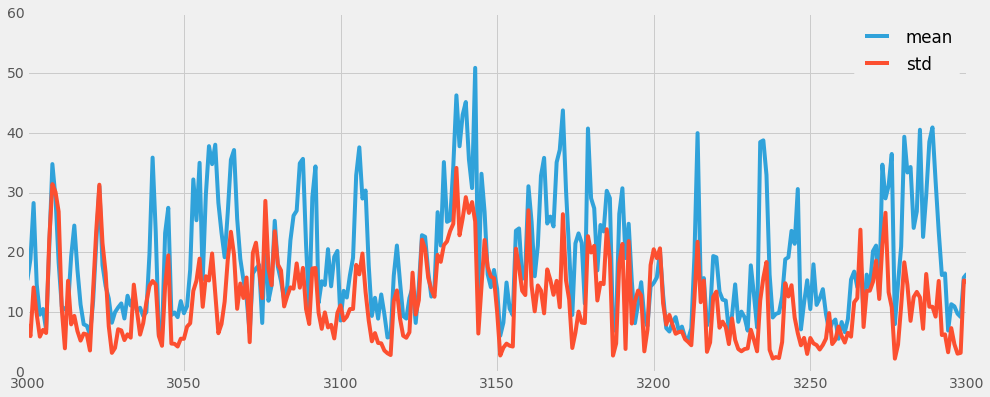

In [93]:
firsthund = refdist.iloc[:,:100]
firsthund['mean'] = firsthund.mean(axis=1,numeric_only=True)
firsthund['std'] =firsthund.std(axis=1,numeric_only=True)
firsthund.loc[3000:3300,['mean','std']].plot(figsize=(15,6))

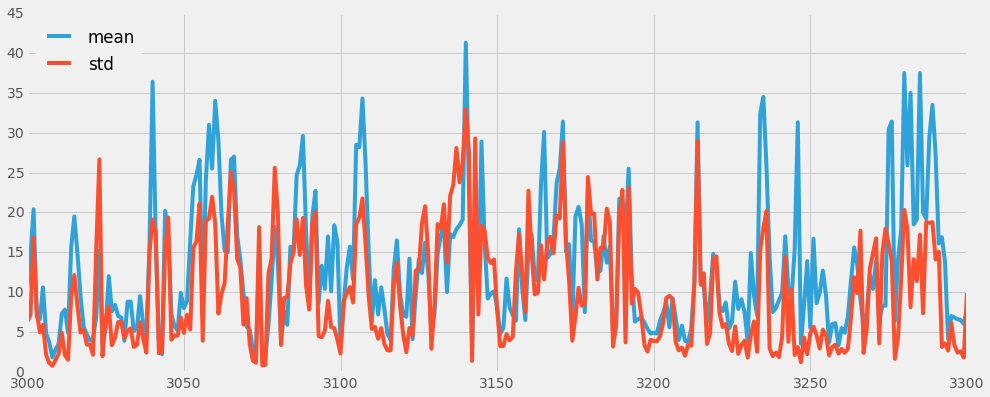

In [94]:
firstten = refdist.iloc[:,:10]
firstten['mean'] = firstten.mean(axis=1,numeric_only=True)
firstten['std'] =firstten.std(axis=1,numeric_only=True)
firstten.loc[3000:3300,['mean','std']].plot(figsize=(15,6))

In [77]:
bim = Counter(sub).most_common(10)
print bim

[('0000000001100000000000000000100000000100000000000000000000000000000000000000000000001000000000000000', 402), ('0000000001100000000000000100100000000100010000000000100101100000000010010100000010001000000000000000', 317), ('1000000001100000000000000000100000000100000000110000100101100000000000010100000000001000000000000000', 75), ('0000000001100000000000000100100000000100010000000000111101100000000010010100000010001000000000000000', 68), ('0101100110001001110001101111110111111011010001000010000000010000000000000000000000011000000000100000', 67), ('0101100111001001110101101111110111111011010001000010000000011000000000000000000000011000000000100000', 65), ('0000000001100000000000000100100000000100010000000000000101100011100110001100000010001000010000000000', 63), ('0000000001100000000000010100100000000100010000000000000101100011100110001100000010001000010000000000', 51), ('0101100111001001110001101111110111111011010001000010000000010000000000000000000000011000000000100000', 40), ('00000

In [80]:
counts = [i[1]/float(2274) for i in Counter(sub).most_common()]
pltter=pd.Series(counts)

In [81]:
for i in bim:
    print sum([int(k) for k in  i[0]]) , i[1]


5 402
15 317
14 75
17 68
32 67
35 65
19 63
20 51
33 40
16 36


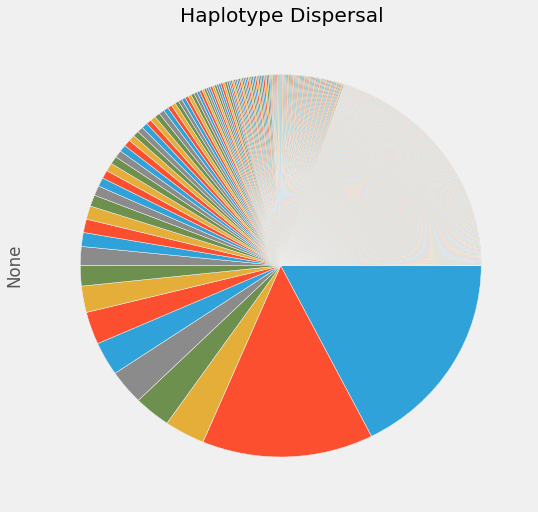

In [82]:
matplotlib.style.use('fivethirtyeight')
pltter.plot(kind='pie',labels=None,title='Haplotype Dispersal',counterclock=False,figsize=(8,8))


In [97]:
pwd

u'/data/jhoff/Imputation/accuracycheck/Haplotype_diversity'